<a href="https://colab.research.google.com/github/TDMDegree/Level-4-Introduction-to-AI-and-ML/blob/main/Workshop%202-%20Regression%20Tutorial%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 3 - Part B - Simple regression

Regression is a fundamental statistical and machine learning technique used to model and analyze the relationships between variables. Specifically, regression helps us understand how the dependent variable (the variable we want to predict) changes when one or more independent variables (the predictors) are varied. The most common form of regression is linear regression, where the relationship between the variables is modeled as a straight line.

In this tutorial, we'll walk through the process of performing a regression analysis in three stages:

**Stage 1: Exploring the Data**

Before diving into modeling, it's crucial to understand and prepare the data. In this stage, we will:


1) Clean the Data: We'll remove any missing values and handle any duplicates to ensure the dataset is complete and free of errors.

2) Check for Correlations: We'll explore the relationships between the variables to identify which ones might be the most influential in predicting the dependent variable.

3) Visualise Distributions: By examining the distribution of the data, we'll gain insights into the data's underlying patterns and potential anomalies.

4) Examining the outliers :Outliers are data points that significantly differ from other observations in the dataset. These can have a substantial impact on the performance and accuracy of a regression model.

**Stage 2: Building the Regression Model**

With a clean and well-understood dataset, we can proceed to develop our regression model. This involves:

Training the Model: Using our prepared dataset, we'll train the model to find the best-fit line (or curve) that minimizes the error between the predicted and actual values.

**Stage 3: Evaluating the Model**

Finally, we need to assess how well our regression model performs. To do this, we'll use:

**Mean Squared Error (MSE)**: This metric measures the average squared difference between the actual and predicted values. A lower MSE indicates a better fit.

**R² Value:** The R² value, or coefficient of determination, indicates how much of the variability in the dependent variable is explained by the independent variables. An R² value closer to 1 signifies a stronger relationship between the variables.

By the end of this tutorial, you'll have a comprehensive understanding of how to perform regression analysis, from data preparation to model evaluation

In [53]:
# Task 1 - import the dataset
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("Salary_dataset.csv")




In [54]:
# Task 2 - Checking duplications and missing values

print("Missing values:\n", df.isnull().sum())

# Check for duplicates
print("Duplicates:\n", df.duplicated().sum())

Missing values:
 Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64
Duplicates:
 0


There are no missing values and no duplicated records, so no additional actions are needed. However, if you do find them, you will need to ensure that the appropriate actions are taken.

In [55]:
# Task 3 - Examining the correlation

correlation = df.corr()
print("Correlation:\n", correlation)

Correlation:
                  Unnamed: 0  YearsExperience    Salary
Unnamed: 0         1.000000         0.986460  0.960826
YearsExperience    0.986460         1.000000  0.978242
Salary             0.960826         0.978242  1.000000


This high positive correlation (close to 1) indicates a strong linear relationship between years of experience and salary. This suggests that as years of experience increase, salary tends to increase as well, which is a typical expectation in many professions.

In the context of a regression model, YearsExperience is likely to be a significant predictor of Salary.

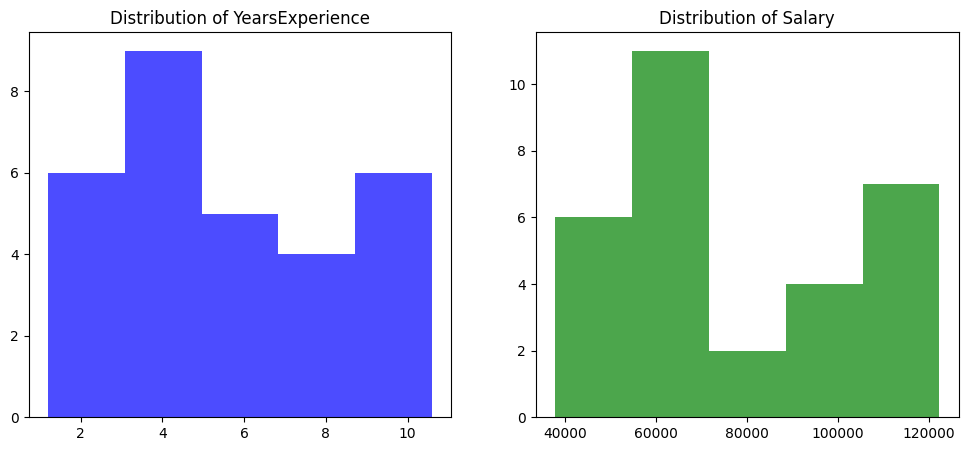

In [56]:
# Task 4 - looking at the distribution

plt.figure(figsize=(12, 5))

# Distribution of YearsExperience
plt.subplot(1, 2, 1)
plt.hist(df['YearsExperience'], bins=5, color='blue', alpha=0.7)
plt.title('Distribution of YearsExperience')

# Distribution of Salary
plt.subplot(1, 2, 2)
plt.hist(df['Salary'], bins=5, color='green', alpha=0.7)
plt.title('Distribution of Salary')

plt.show()

In simple linear regression, you have a single independent variable (predictor) and one dependent variable (response). Scaling is typically less of an issue here because:

Single Predictor: With only one predictor, there's no concern about different ranges of predictors affecting the model. Scaling the predictor doesn’t change the nature of the relationship between the predictor and the response.

**Multiple Regression**

In multiple regression, where you have multiple predictors, scaling becomes more important due to several reasons:

Different Ranges: Predictors may be on very different scales (e.g., age in years vs. income in thousands of dollars). Without scaling, predictors with larger ranges or units could disproportionately affect the model's performance and the coefficient estimates. Scaling ensures that all predictors contribute equally to the regression model.

Regularization: If you’re using regularization techniques like Ridge or Lasso regression, scaling is crucial. Regularization methods add a penalty based on the magnitude of the coefficients. If predictors are on different scales, the regularization term will disproportionately penalize predictors with larger scales. Scaling normalizes the influence of each predictor, allowing regularization to work effectively.



Unnamed: 0         0.0
YearsExperience    0.0
Salary             0.0
outlier            0.0
dtype: float64


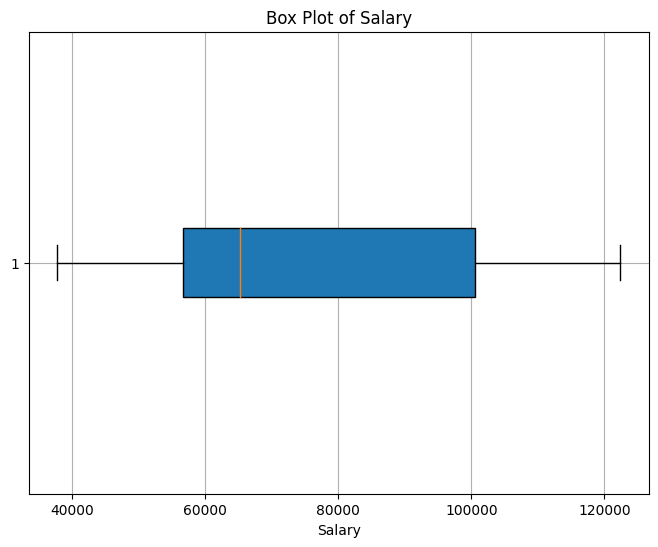

In [57]:
# Task 5 - dropping the outliers in the salary records
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for identifying outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
df['outlier'] = (df['Salary'] < lower_bound) | (df['Salary'] > upper_bound)

# Display the results
print(df[df['outlier'] == True].sum())

# Checking again to see if there is any outliers within a box plot
plt.figure(figsize=(8, 6))
plt.boxplot(df['Salary'], vert=False, patch_artist=True)
plt.title('Box Plot of Salary')
plt.xlabel('Salary')
plt.grid(True)
plt.show()

Two methods were used to check for outliers: one was the box plot graph, and the other was the IQR mathematical approach. Neither showed any outliers, so no additional actions were required.

In [58]:
# Task 6 - Making the model
x = df[['YearsExperience']].values
y = df['Salary'].values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)


Ridge(alpha=0.1)

Three models were selected. In your report, it you select all three you might be ready to explain the differences.

In [59]:
# Evaluating the models

y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Linear Regression MSE:", mse_linear)
print("Linear Regression R²:", r2_linear)

y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso Regression MSE:", mse_lasso)
print("Lasso Regression R²:", r2_lasso)

y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression MSE:", mse_ridge)
print("Ridge Regression R²:", r2_ridge)

Linear Regression MSE: 49830096.855908394
Linear Regression R²: 0.9024461774180497
Lasso Regression MSE: 49830130.61850801
Lasso Regression R²: 0.9024461113200314
Ridge Regression MSE: 49843476.71904711
Ridge Regression R²: 0.9024199832728009


Definitions

    Mean Squared Error (MSE): Measures the average squared difference between the predicted values and the actual values. Lower MSE values indicate better model performance.
    R-squared (R2R2): Indicates the proportion of the variance in the dependent variable that is predictable from the independent variables. Values closer to 1 suggest a better fit.

Metrics Provided

    Linear Regression
        MSE: 49,830,096.86
        R²: 0.9024

    Lasso Regression
        MSE: 49,830,130.62
        R²: 0.9024

    Ridge Regression
        MSE: 49,843,476.72
        R²: 0.9024

Analysis

    MSE Comparison:
        Linear Regression has the lowest MSE (49,830,096.86), suggesting it performs slightly better in terms of predicting accuracy compared to Lasso and Ridge regressions.
        Lasso Regression has an MSE (49,830,130.62) almost identical to Linear Regression, but slightly higher.
        Ridge Regression has the highest MSE (49,843,476.72), indicating it is marginally less accurate in predictions compared to both Linear and Lasso regressions.

    R-squared Comparison:
        All models have a very similar R2R2 value of 0.9024. This indicates that all three models explain approximately 90.24% of the variance in the response variable. There is very little difference in their explanatory power.

    Model Performance:
        The minimal differences in MSE suggest that all three models are very close in performance, with Linear Regression being the best by a small margin.
        The similar R2R2 values indicate that the models perform similarly in terms of explaining the variance in the data.

    Regularisation Effects:
        Lasso Regression applies L1 regularisation, which can lead to sparse models where some coefficients are exactly zero. In this case, it has almost the same MSE and R2R2 as Linear Regression, suggesting that the sparsity induced by Lasso doesn’t have a significant effect on the model’s performance for this dataset.
        Ridge Regression applies L2 regularisation, which penalises the size of the coefficients but doesn’t necessarily drive them to zero. The slight increase in MSE suggests that the Ridge regularisation might be slightly over-penalising the coefficients for this dataset.

Summary

    Overall Performance: Linear Regression has the best performance in terms of MSE, but the differences are minimal.
    Model Fit: All models have similar R2R2 values, indicating that they all explain about 90.24% of the variance in the response variable.
    Regularisation: The regularised models (Lasso and Ridge) don’t show a significant improvement over the standard Linear Regression in terms of predictive accuracy or explanatory power for this dataset.